In [9]:
! pip install interpret
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 4.6 MB/s eta 0:00:28
   ---------------------------------------- 0.8/124.9 MB 8.5 MB/s eta 0:00:15
   ---------------------------------------- 1.4/124.9 MB 11.4 MB/s eta 0:00:11
    --------------------------------------- 2.1/124.9 MB 10.9 MB/s eta 0:00:12
    --------------------------------------- 2.6/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 3.3/124.9 MB 11.9 MB/s eta 0:00:11
   - -------------------------------------- 4.1/124.9 MB 12.5 MB/s eta 0:00:10
   - -------------------------------------- 4.7/124.9 MB 12.5 MB/s eta 0:00:10
   - -------------------------------------- 5.4/124.9 MB 12.7 MB/s eta 0:00:10
   - -------------------------------------- 5.9/124.9 MB 13.1 MB/s eta 0:00:10
   -- ------------------------------------- 6.8/124.9 MB 13.2 MB/s eta 0:00:09
   -- ------------------------------------- 7.6/124.9 MB 13.6 

ExactExplainer explainer: 1001it [00:19, 23.88it/s]                                                                    


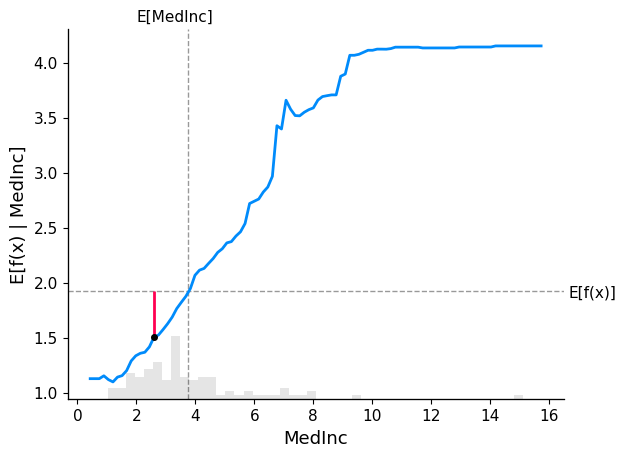

In [4]:
# fit a GAM model to the data
import interpret.glassbox
import shap
import sklearn

X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 20
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

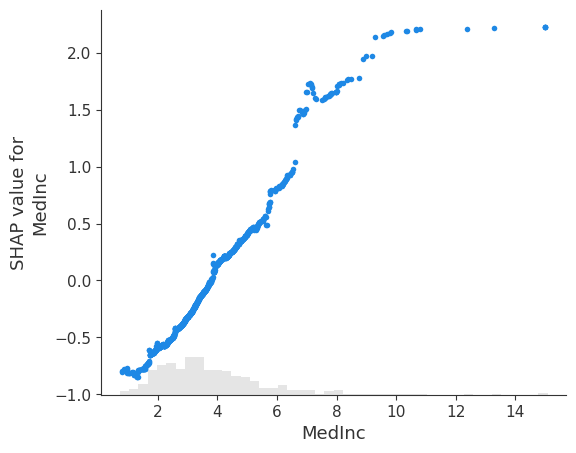

In [5]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

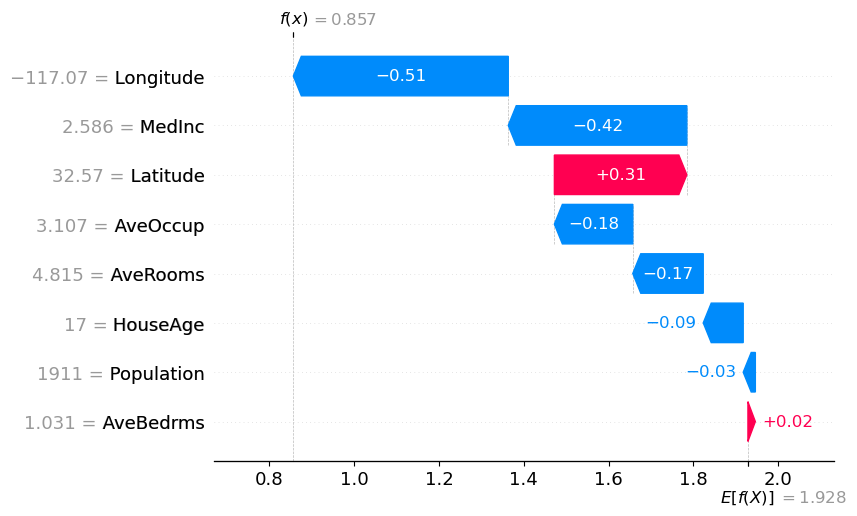

In [6]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind])

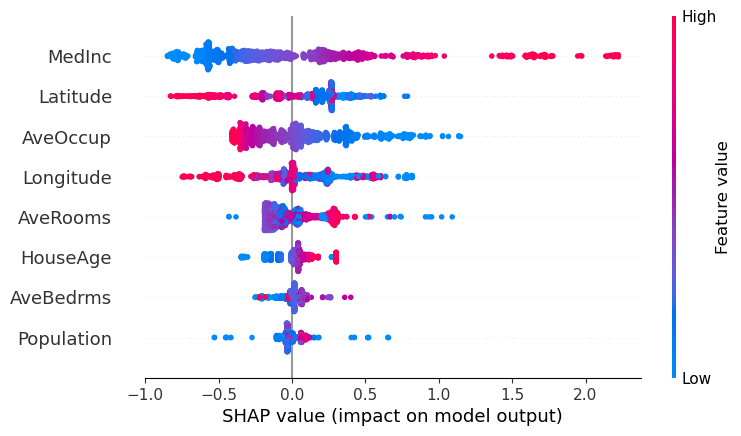

In [7]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm)

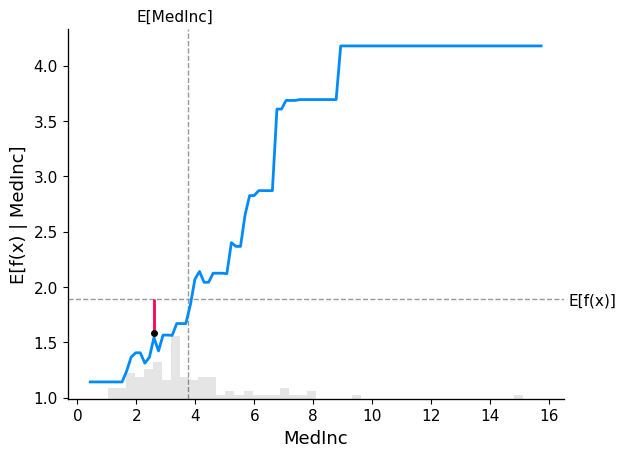

In [10]:
# train XGBoost model
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

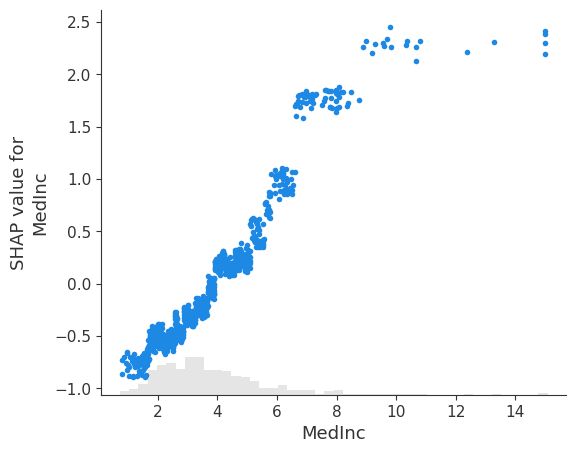

In [11]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"])

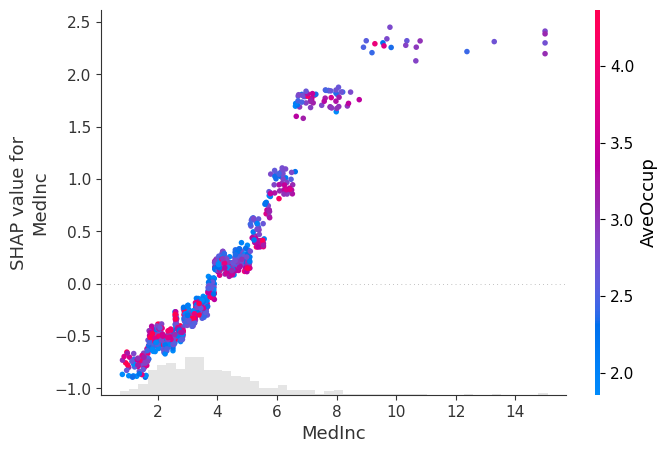

In [13]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"], color=shap_values_xgb)